In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(8,6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
raw=pd.read_csv('F:\\study\\ml\\DataSet\\Kobe_shot\\data.csv\\data.csv')
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [4]:
nona=raw[raw.shot_made_flag.notnull()]

In [5]:
nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

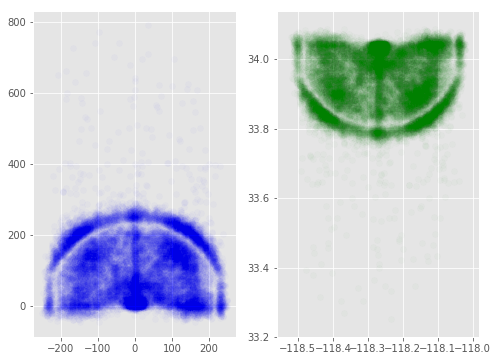

In [6]:
plt.subplot(121)
plt.scatter(nona.loc_x,nona.loc_y,color='b',alpha=0.02)
plt.subplot(122)
plt.scatter(nona.lon,nona.lat,color='g',alpha=0.02)

In [7]:
np.array([1]*len(raw))

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
loc_x_zero=raw.loc_x == 0
[loc_x_zero]


[0        False
 1        False
 2        False
 3        False
 4         True
 5        False
 6         True
 7        False
 8        False
 9        False
 10       False
 11       False
 12       False
 13       False
 14       False
 15       False
 16        True
 17       False
 18       False
 19        True
 20       False
 21       False
 22       False
 23       False
 24       False
 25        True
 26       False
 27       False
 28       False
 29       False
          ...  
 30667    False
 30668    False
 30669    False
 30670    False
 30671     True
 30672    False
 30673    False
 30674    False
 30675    False
 30676    False
 30677    False
 30678    False
 30679     True
 30680     True
 30681    False
 30682    False
 30683    False
 30684    False
 30685    False
 30686    False
 30687    False
 30688    False
 30689    False
 30690    False
 30691     True
 30692    False
 30693     True
 30694    False
 30695    False
 30696    False
 Name: loc_x, Length: 30

In [9]:
raw['dist']=np.sqrt(raw.loc_x**2 + raw.loc_y**2)
loc_x_zero=raw.loc_x == 0
raw['angle']=np.array([0]*len(raw))
raw['angle'][~loc_x_zero]=np.arctan(raw.loc_y[~loc_x_zero]/raw.loc_x[~loc_x_zero])
raw['angle'][loc_x_zero]=np.pi/2

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
raw['remaining_time']=raw['minutes_remaining']*60+raw['seconds_remaining']

In [11]:
nona.action_type.unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [12]:
nona.combined_shot_type.unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'],
      dtype=object)

In [13]:
nona.shot_type.unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [14]:
nona.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [15]:
raw['season']=raw.season.apply(lambda x:int(x.split('-')[1]))

In [16]:
raw.season.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [17]:
nona.team_id.unique()

array([1610612747], dtype=int64)

In [18]:
nona.team_name.unique()

array(['Los Angeles Lakers'], dtype=object)

In [19]:
pd.DataFrame({'matchup':nona.matchup,'opponent':nona.opponent})

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


Text(0.5,1,'dist and shot_dist')

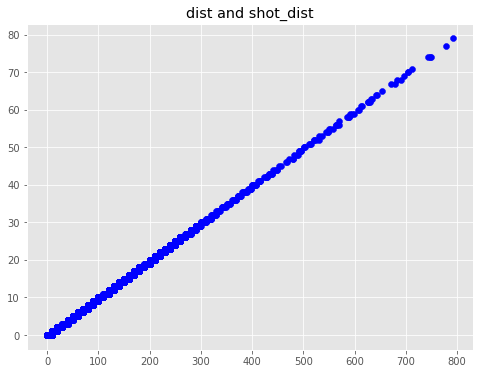

In [20]:
plt.scatter(raw.dist,raw.shot_distance,color='b')
plt.title('dist and shot_dist')

In [21]:
import matplotlib.cm as cm

In [22]:
def scatter_plot_by_category(feat):
    alpha=0.1
    gs=nona.groupby(feat)
    cs=cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color=c,alpha=0.1)
    

Text(0.5,1,'shot_zone_range')

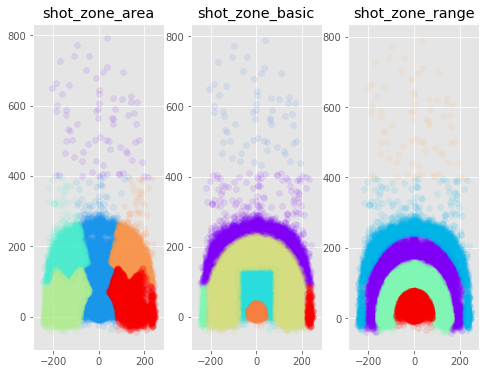

In [23]:
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [24]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']

In [25]:
for drop in drops:
    raw=raw.drop(drop,1)

In [26]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']

In [27]:
for var in categorical_vars:
    raw=pd.concat([raw,pd.get_dummies(raw[var],prefix=var)],1)
    raw=raw.drop(var,1)

In [28]:
df=raw[raw.shot_made_flag.notnull()]
submission=raw[raw.shot_made_flag.isnull()]
submission=submission.drop('shot_made_flag',1)

In [29]:
train=df.drop('shot_made_flag',1)
train_y=df['shot_made_flag']

In [31]:
import scipy as sp    

In [ ]:
def logloss(act,pred):
    epsilon=1e-15
    pred = sp.maximum(epsilon,pred)
    pred=sp.minimum(1-epsilon,pred)
    ll=sum(act*sp.log(pred) + sp.subtract(1,act)*sp)